# Step1: Import the necessary library

In [7]:
#Importing openCv both as cv2 and cv for better convinence 
import cv2  
import cv2 as cv 
# Importing numpy for working with numpy arrays
import numpy as np 
# Importing pyplot as plt from maplotlib for Image Visualization
from matplotlib import pyplot as plt 
#Importing PIL library for working with Images
from PIL import Image 
#Importing asarray method from numpy for dealing with pixels of Images
from numpy import asarray 
import matplotlib.image as mpimg
#Importing ndimage from scipy as this package contains various functions for multidimensional image processing.
from scipy import ndimage
#Importing filters, features, measures and color from skimage
from skimage import filters, feature, measure, color
#Importing Watershed for touching Grains sepration
from skimage.segmentation import watershed


# Defining the image_Show function

In [8]:
#Defining show function for displaying  image with custom X and Y cordinates

def Image_show(image,x=33,y=7):
  photo=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(x,y))
  plt.imshow(photo)


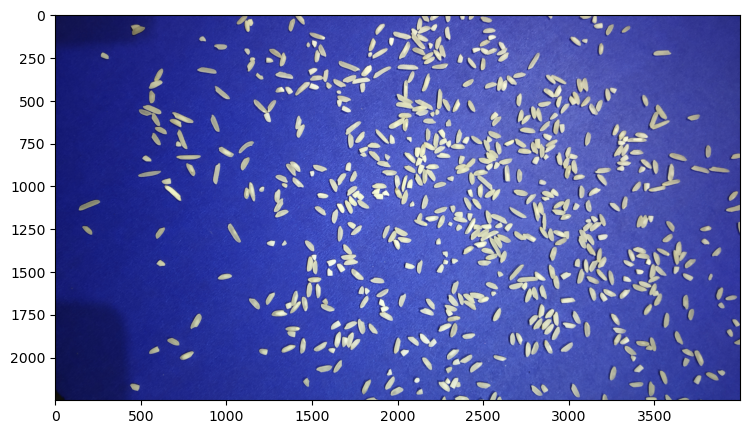

In [9]:
image=cv2.imread("test\image_1.jpg")
Image_show(image,25,5)

# Image preprocessing ,we converting the Background colour

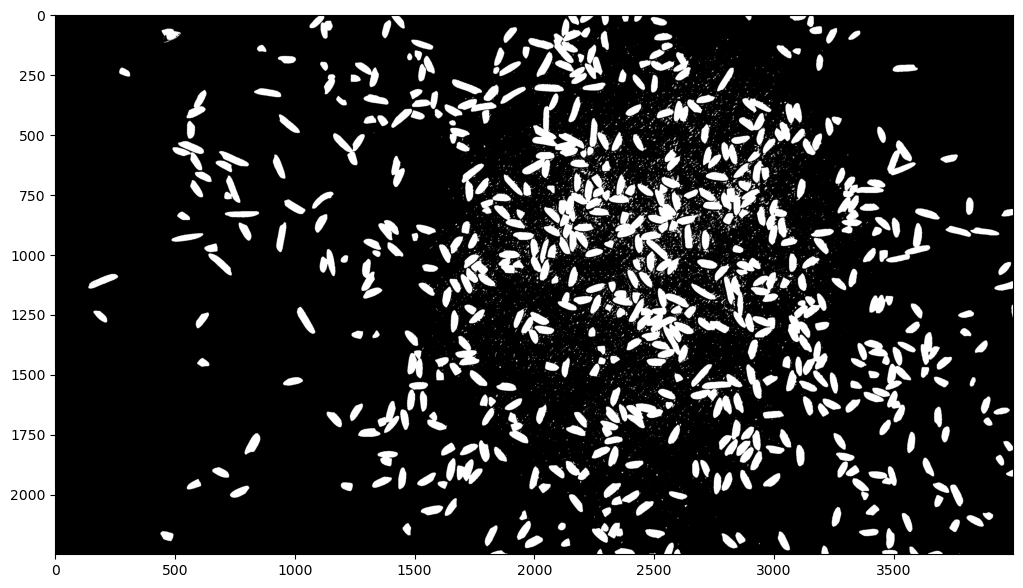

In [10]:
grayscale_Image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, threshold_image = cv2.threshold(grayscale_Image, 120, 255, cv2.THRESH_BINARY)

#Using show function earlier defined
Image_show(threshold_image)

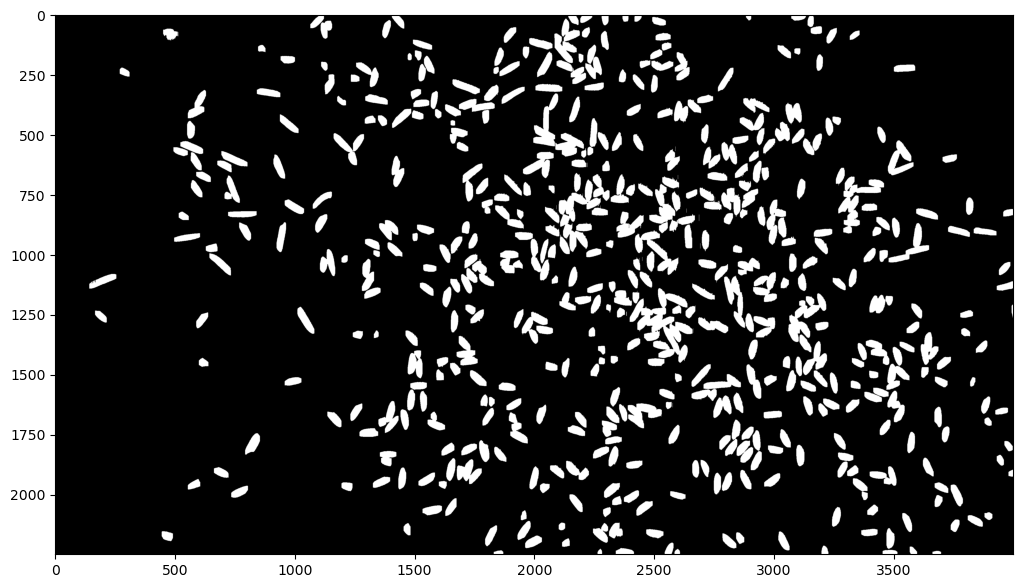

In [11]:
# Noise removal
kernel = np.ones((3),np.uint8)
clear_image = cv2.morphologyEx(threshold_image,cv2.MORPH_OPEN, kernel, iterations=8)

#Using show function earlier defined
Image_show(clear_image)

# Removing noise from an image(Morphological function)

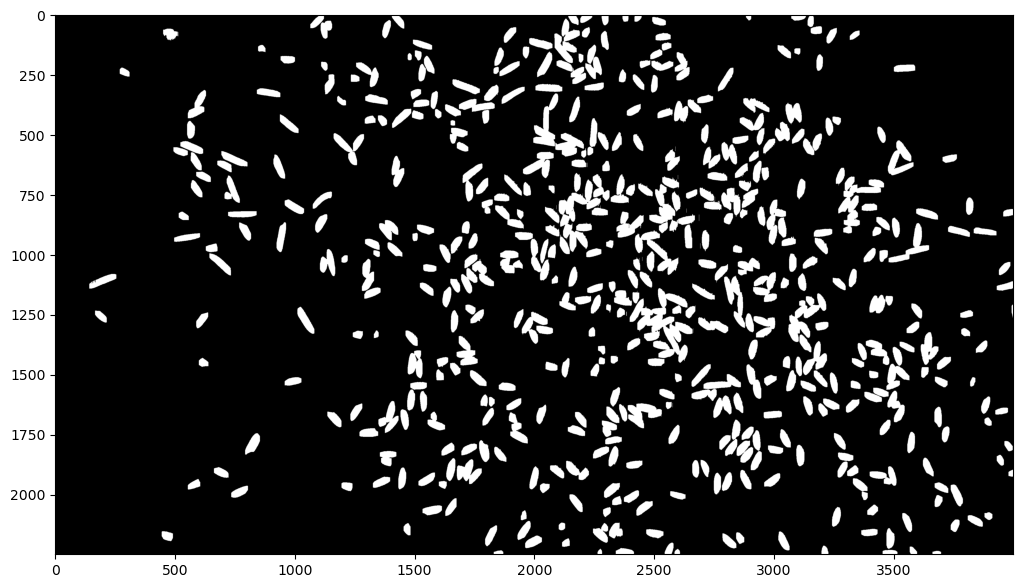

In [15]:
# Noise removal
kernel = np.ones((3),np.uint8)
clear_image = cv2.morphologyEx(threshold_image,cv2.MORPH_OPEN, kernel, iterations=8)

#Using show function earlier defined
Image_show(clear_image)

In [16]:
#Applying Countours method to get the count of rice grains
contours, hierarchy = cv.findContours(clear_image, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour = cv.cvtColor(clear_image, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))

Number of detected contours 513


In [17]:
#To visualize the segmentation conveniently, There needed a colour-code the labelled regions using the color, thus I did it.


#Applying  distance_transform_edt to computes the distance from non-zero (i.e. non-background) points to the nearest zero (i.e. background) point.
dist_trans = ndimage.distance_transform_edt(clear_image)

#Applying peak_local_max function for getting coordinates of local peaks (maxima) in an image.
local_max = feature.peak_local_max(dist_trans, min_distance=23)


local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True

#Aplying Watershed algorithm
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image) # separate merged corns


Number of Rice grains are : 586


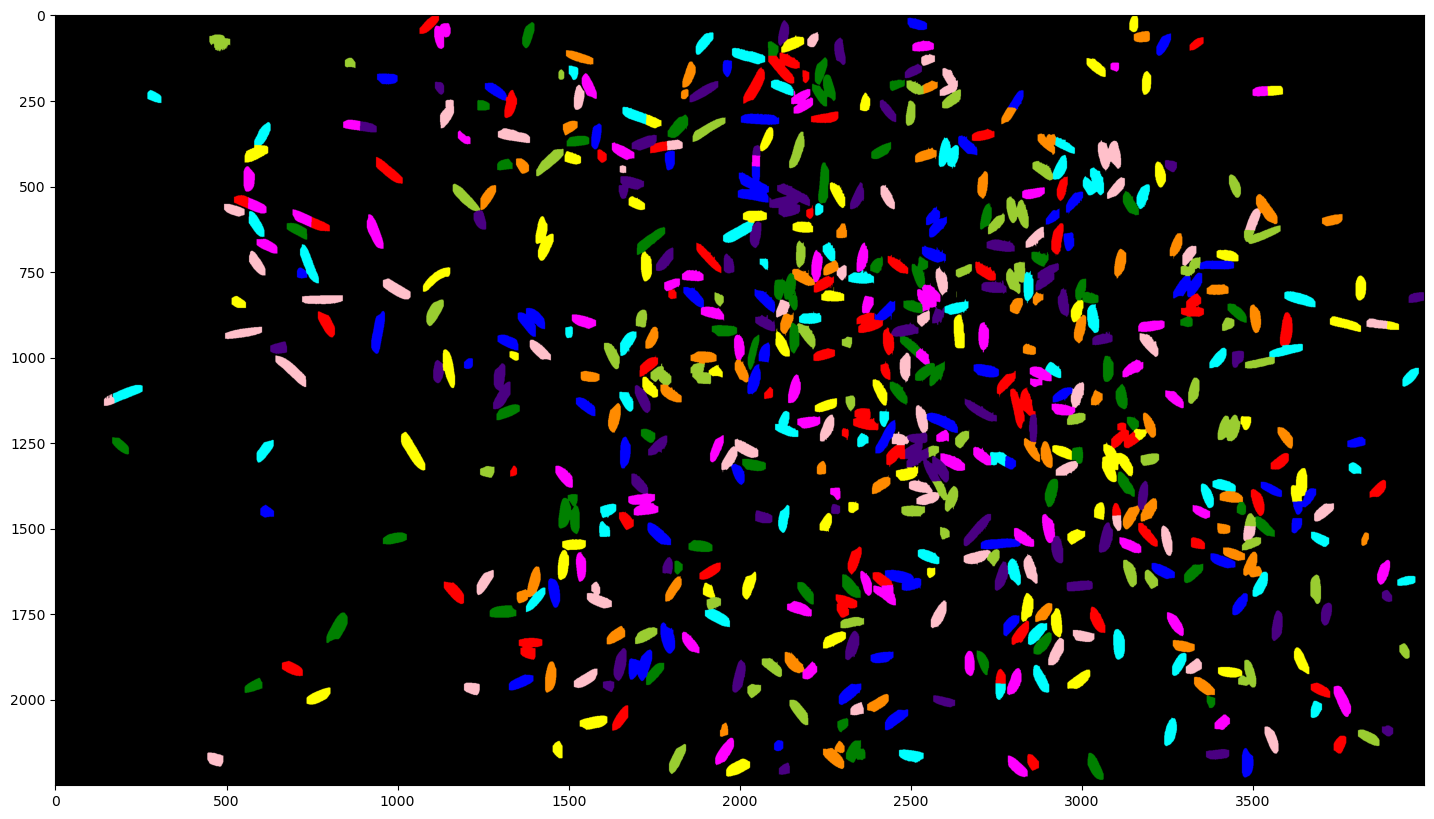

In [18]:
#label2rgb function, specifying the background label with argument bg_label=0.
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels, bg_label=0))
print("Number of Rice grains are : %d" % labels.max())

In [20]:
#Creating A list name count for counting the total Broken rice grains
count = []

#Iterating through contour and filtering out the rice grains with area less than 800 and then appending to the count variable.
for x in contours:

  #Using contourArea method to get the area of rice (Contour)
  area = cv.contourArea(x)
  if area < 800 :
    count.append(x)

#Output of the count list.

print("Total number of broken rice present in the Image is: ",len(count))

Total number of broken rice present in the Image is:  87


# There are someother methods also there like split and count but i had a research on the above implementation 

# Thank you